In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
#from scipy.sparse import coo_matrix 
from sklearn.cluster import KMeans
import networkx as nx

In [2]:
class SpectralClustering:
    
    def __init__(self):
        self.nodes = None
        self.labels = None
        
    def fit(self, DataFrame, node1, node2, weight):
        self.nodes = DataFrame[[node1]].tolist() + DataFrame[[node2]].tolist()
        self.nodes = sorted(list(set(nodes)))
        
        A = sc.sparse.coo_matrix((DataFrame[[weight]], (DataFrame[[node1]],DataFrame[[node2]]))).toarray()
        if len(nodes) == A.shape[0] - 1:
            A = np.delete(A, 0, 0)
            A = np.delete(A, 0, 1)
        
        fig = plt.figure()
        plt.spy(A)
        plt.title('Sparsity Affinity Matrix')
        plt.savefig('images/sparsityA_{}.png'.format(DataFrame.name))
        plt.close(fig)
        
        D = np.diag(np.sum(A, axis=1))
        
        # Ratio cut
        L = D - A
        eig_vals, eig_vecs = sc.linalg.eigh(L) 
        fig = plt.figure()
        plt.plot(np.sort(eig_vecs[:, 1])) # Fiedler vector = eigenvector of second smallest eigenvalue of L
        plt.title('Fiedler vector of Laplacian Matrix')
        plt.savefig('images/FiedlerL_{}.png'.format(DataFrame.name))
        plt.close(fig)
        
        # Conductance
        sqrt_D = np.diag(1.0 / (D ** (0.5)))
        normal_L = np.dot(np.dot(sqrt_D, A), sqrt_D)
        
        eig_vals, eig_vecs = sc.linalg.eigh(normal_L)
        
        # Eigengap heuristic suggests the number of clusters k is usually given by 
        # the value of k that maximizes the eigengap (difference between consecutive eigenvalues). 
        k = np.argmin(np.ediff1d(np.flipud(eig_vals))) + 1
        
        X = eig_vecs[:,len(nodes)-k:]
        div = np.linalg.norm(X, axis=1).reshape(X.shape[0], 1)
        
        Y = np.divide(X, div)
        
        clustering = KMeans(n_clusters=k).fit(Y)
        self.labels = clustering.labels_

In [3]:
data1 = pd.read_csv('data/example1.dat', names=['source','target'])
data1.name = 'example1'
data1['weight'] = 1

In [ ]:
spectral_data1 = SpectralClustering()
spectral_data1.fit(data1, 'source', 'target', 'weight')

In [10]:
G = nx.from_pandas_edgelist(data1, 'source', 'target')

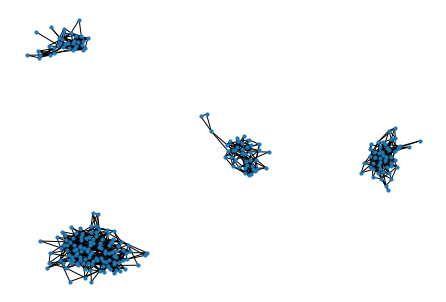

In [24]:
nx.draw(G, node_size=10)
plt.show()

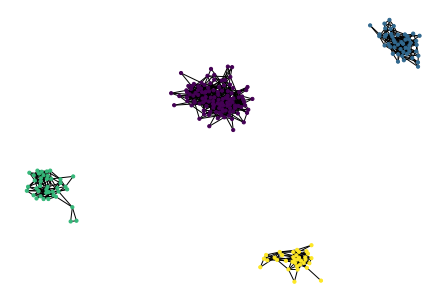

In [119]:
nx.draw(G, node_size=10, node_color=spectral_data1.labels)

In [165]:
data2 = pd.read_csv('data/example2.dat', names=['source','target','weight'])
data2 = data2.sort(['source', 'target'])
data2.name = 'example2'

In [ ]:
spectral_data1 = SpectralClustering()
spectral_data2.fit(data1, 'source', 'target', 'weight')

In [10]:
G = nx.from_pandas_edgelist(data2, 'source', 'target')

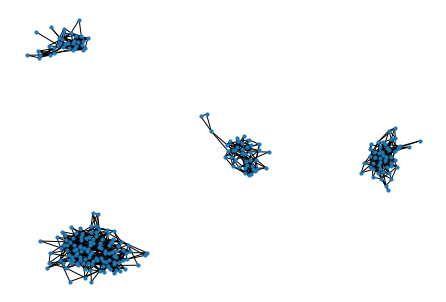

In [24]:
nx.draw(G, node_size=10)
plt.show()

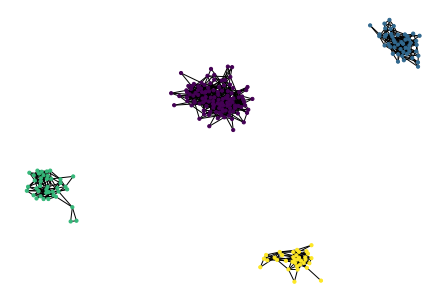

In [119]:
nx.draw(G, node_size=10, node_color=labels)

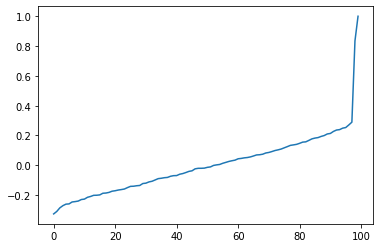

In [171]:
plt.plot(eig_vals)
plt.show()

In [ ]:
L = D - A
values, vectors = sc.linalg.eigh(L) 
fig=plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.spy(A) 
plt.title('sparsity')
plt.subplot(1,2,2)
plt.plot(np.sort(vectors[:, 1]))# vector of second smallest eigenvalue of L
plt.title('fiedler')
plt.show()

In [73]:
A = np.asarray(nx.adjacency_matrix(G).todense())

In [44]:
data1

,source,target,weight
0,1,2,1
1,1,3,1
2,1,4,1
3,1,5,1
4,1,6,1
...,...,...,...
2191,219,235,1
2192,240,235,1
2193,216,235,1
2194,213,235,1


In [45]:
nodes = data1.iloc[:, 0].tolist() + data1.iloc[:, 1].tolist()

In [46]:
nodes = sorted(list(set(nodes)))

In [85]:
A = sc.sparse.coo_matrix((data1.iloc[:,2], (data1.iloc[:,0],data1.iloc[:,1]))).toarray()

In [86]:
A = np.delete(A, 0, 0)
A = np.delete(A, 0, 1)

In [87]:
A

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [88]:
D = np.diag(np.sum(A, axis=1))

In [89]:
D

array([[ 7,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  0, ...,  0,  0,  0],
       [ 0,  0, 11, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  0,  2]])

In [90]:
D_T = np.linalg.inv(np.sqrt(D))

In [91]:
D_T

array([[0.37796447, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.30151134, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.35355339,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.70710678]])

In [92]:
L = np.dot(np.dot(D_T, A), D_T)

In [93]:
L

array([[0.        , 0.12598816, 0.11396058, ..., 0.        , 0.        ,
        0.        ],
       [0.12598816, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11396058, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [98]:
eig_vals, eig_vecs = sc.linalg.eigh(L)

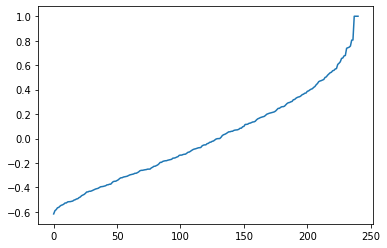

In [99]:
plt.plot(eig_vals)
plt.show()

In [100]:
k=np.argmin(np.ediff1d(np.flipud(eig_vals)))+1
print(k)

4


In [101]:
X = eig_vecs[:,len(nodes)-k:]

In [107]:
X

array([[ 0.        ,  0.        , -0.08035897,  0.        ],
       [ 0.        ,  0.        , -0.09111851,  0.        ],
       [ 0.        ,  0.        , -0.1007353 ,  0.        ],
       [ 0.        ,  0.        , -0.10951082,  0.        ],
       [ 0.        ,  0.        , -0.11364475,  0.        ],
       [ 0.        ,  0.        , -0.07439795,  0.        ],
       [ 0.        ,  0.        , -0.04295368,  0.        ],
       [ 0.        ,  0.        , -0.06791573,  0.        ],
       [ 0.        ,  0.        , -0.12523041,  0.        ],
       [ 0.        ,  0.        , -0.12523041,  0.        ],
       [ 0.        ,  0.        , -0.12523041,  0.        ],
       [ 0.        ,  0.        , -0.13583146,  0.        ],
       [ 0.        ,  0.        , -0.12886103,  0.        ],
       [ 0.        ,  0.        , -0.10521459,  0.        ],
       [ 0.        ,  0.        , -0.16635888,  0.        ],
       [ 0.        ,  0.        , -0.12886103,  0.        ],
       [ 0.        ,  0.

In [108]:
divisor = np.reshape(np.linalg.norm(X, axis=1), (X.shape[0], 1))

In [111]:
divisor

array([[0.08035897],
       [0.09111851],
       [0.1007353 ],
       [0.10951082],
       [0.11364475],
       [0.07439795],
       [0.04295368],
       [0.06791573],
       [0.12523041],
       [0.12523041],
       [0.12523041],
       [0.13583146],
       [0.12886103],
       [0.10521459],
       [0.16635888],
       [0.12886103],
       [0.10521459],
       [0.10951082],
       [0.10951082],
       [0.09604734],
       [0.08590736],
       [0.09111851],
       [0.13239213],
       [0.1007353 ],
       [0.10951082],
       [0.1007353 ],
       [0.08590736],
       [0.1007353 ],
       [0.11763349],
       [0.08590736],
       [0.10951082],
       [0.09604734],
       [0.09111851],
       [0.07439795],
       [0.10951082],
       [0.11364475],
       [0.07439795],
       [0.09604734],
       [0.08035897],
       [0.13918582],
       [0.11364475],
       [0.09111851],
       [0.08590736],
       [0.08035897],
       [0.10951082],
       [0.1007353 ],
       [0.1007353 ],
       [0.100

In [112]:
Y = np.divide(X, divisor)

In [113]:
Y

array([[ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  

In [115]:
clustering = KMeans(n_clusters=k).fit(Y)

In [116]:
labels = clustering.labels_

In [117]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [118]:
labels.shape

(241,)

In [122]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

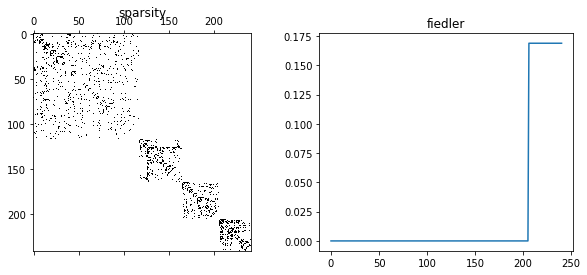

In [123]:
L = D - A
values, vectors = sc.linalg.eigh(L) 
fig=plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.spy(A) 
plt.title('sparsity')
plt.subplot(1,2,2)
plt.plot(np.sort(vectors[:, 1]))# vector of second smallest eigenvalue of L
plt.title('fiedler')
plt.show()

In [127]:
nodes = data2.iloc[:, 0].tolist() + data2.iloc[:, 1].tolist()
nodes = sorted(list(set(nodes)))

In [128]:
A = sc.sparse.coo_matrix((data2.iloc[:,2], (data2.iloc[:,0],data2.iloc[:,1]))).toarray()

In [130]:
A = np.delete(A, 0, 0)
A = np.delete(A, 0, 1)

In [131]:
A

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 0]])

In [151]:
A

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [166]:
G = nx.from_pandas_edgelist(data2, 'source', 'target', 'weight')

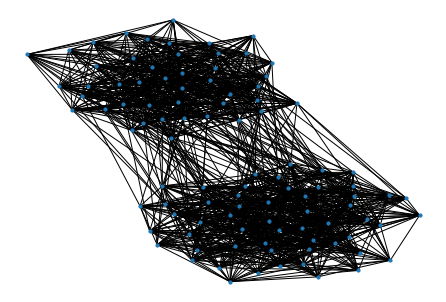

In [167]:
nx.draw(G, node_size=10)

In [168]:
A = np.asarray(nx.adjacency_matrix(G).toarray())

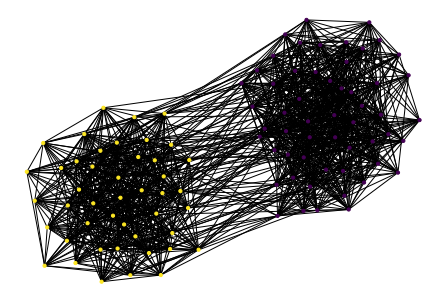

In [169]:
D = np.diag(np.sum(A, axis=1))
D_T = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_T, A), D_T)
eig_vals, eig_vecs = sc.linalg.eigh(L)
k=np.argmin(np.ediff1d(np.flipud(eig_vals)))+1

X = eig_vecs[:,len(nodes)-k:]
divisor = np.reshape(np.linalg.norm(X, axis=1), (X.shape[0], 1))
Y = np.divide(X, divisor)

clustering = KMeans(n_clusters=k).fit(Y)
labels = clustering.labels_

nx.draw(G, node_size=10, node_color=labels)

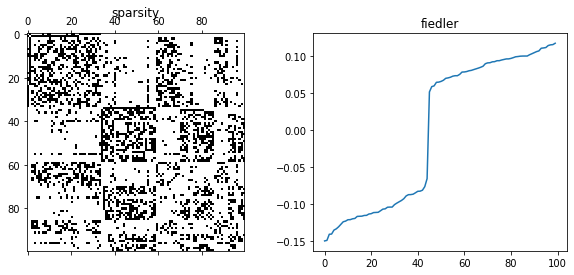

In [170]:
L = D - A
values, vectors = sc.linalg.eigh(L) 
fig=plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.spy(A) 
plt.title('sparsity')
plt.subplot(1,2,2)
plt.plot(np.sort(vectors[:, 1]))# vector of second smallest eigenvalue of L
plt.title('fiedler')
plt.show()